## <font color = 'blue'><b> Import DataSet and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns' , None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [2]:
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

In [4]:
# Feature Scaling

numerical_features = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate',
         'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike',
        'PerformanceRating','RelationshipSatisfaction','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',
                     'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

X_test[numerical_features] = scaler.transform(X_test[numerical_features])

X_test.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,32.0,116.0,13.0,3.0,3.0,77.0,2.0,1.0,2.0,2743.0,7331.0,1.0,0,20.0,4.0,3.0,1,2.0,2.0,3.0,2.0,2.0,2.0,2.0
1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,53.0,1436.0,6.0,2.0,2.0,34.0,3.0,2.0,3.0,2306.0,16047.0,2.0,1,20.0,4.0,4.0,1,13.0,3.0,1.0,7.0,7.0,4.0,5.0
2,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,39.0,613.0,6.0,1.0,4.0,42.0,2.0,3.0,1.0,9991.0,21457.0,4.0,0,15.0,3.0,1.0,1,9.0,5.0,3.0,7.0,7.0,1.0,7.0
3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,34.0,971.0,1.0,3.0,4.0,64.0,2.0,3.0,3.0,7083.0,12288.0,1.0,1,14.0,3.0,4.0,0,10.0,3.0,3.0,10.0,9.0,8.0,6.0
4,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,50.0,333.0,22.0,5.0,3.0,88.0,1.0,4.0,4.0,14411.0,24450.0,1.0,1,13.0,3.0,4.0,0,32.0,2.0,3.0,32.0,6.0,13.0,9.0


In [6]:
y_test_pred = res.predict(X_test_sm)

In [7]:
y_test_pred[:10]

0    1.688983e-01
1    1.616995e-01
2    2.589097e-02
3    2.093724e-01
4    3.394590e-01
5    3.776056e-02
6    5.172833e-01
7    1.072665e-10
8    1.160398e-01
9    2.551281e-02
dtype: float64

In [8]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [9]:
# Let's see the head
y_pred_1.head()

,0
0,0.168898
1,0.161700
2,0.025891
3,0.209372
4,0.339459


In [10]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [11]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [12]:
y_pred_final.head()

,Attrition,0
0,0,0.168898
1,0,0.161700
2,0,0.025891
3,0,0.209372
4,0,0.339459


In [13]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Attrition_Prob'})

In [14]:
y_pred_final['final_predicted'] = y_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.2 else 0)

In [15]:
y_pred_final.head()

,Attrition,Attrition_Prob,final_predicted
0,0,0.168898,0
1,0,0.161700,0
2,0,0.025891,0
3,0,0.209372,1
4,0,0.339459,1


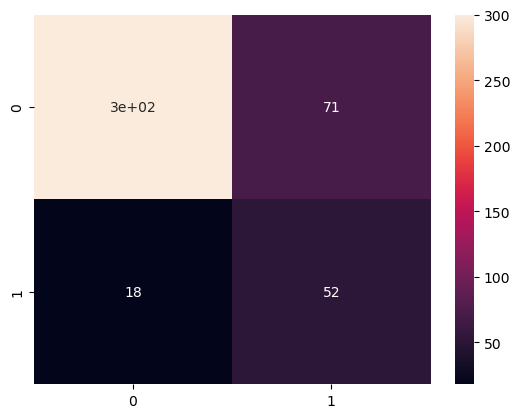

In [16]:
cm = confusion_matrix(y_pred_final.Attrition, y_pred_final.final_predicted)
sns.heatmap(cm, annot=True)
plt.show()

In [17]:
print(classification_report(y_pred_final.Attrition, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       371
           1       0.42      0.74      0.54        70

    accuracy                           0.80       441
   macro avg       0.68      0.78      0.70       441
weighted avg       0.86      0.80      0.82       441



In [18]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [19]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7428571428571429

In [20]:
# Let us calculate specificity
TN / float(TN+FP)

0.8086253369272237

In [21]:
# Calculate false postive rate - predicting Attrition when employee stayed
print(FP/ float(TN+FP))

0.19137466307277629


In [22]:
# Positive predictive value 
print (TP / float(TP+FP))

0.42276422764227645


In [23]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9433962264150944


#### The evaluation metrics for both train & test data set is comparable , which shows that model is performing well for Test DataSet as well